 # Cvičení 11. Vícevýběrové testy
 ## Michal Béreš, Martina Litschmannová, Adéla Vrtková

## Testovací data pro ukázku volání funkcí

In [1]:
# vyrobím data framy o jednom sloupci z náh. dat
a <- as.data.frame(rnorm(n = 35, mean = 107, sd = 10))
b <- as.data.frame(rnorm(n = 30, mean = 105, sd = 10))
c <- as.data.frame(rnorm(n = 40, mean = 102, sd = 10))
d <- as.data.frame(rnorm(n = 32, mean = 101, sd = 10))

# přejmenuju název sloupce
colnames(a) <- c("hodnota")
colnames(b) <- c("hodnota")
colnames(c) <- c("hodnota")
colnames(d) <- c("hodnota")

# doplním typ pro všechny data framy
a$typ <- "a"
b$typ <- "b"
c$typ <- "c"
d$typ <- "d"

# slepím po řádcích dohromady
data <- rbind(a, b, c, d)
# převedu typ na typ factor
data$typ <- as.factor(data$typ)

head(data)


,hodnota,typ
,<dbl>,<fct>
1,105.37963,a
2,108.02147,a
3,116.39581,a
4,116.10329,a
5,108.58851,a
6,94.95926,a


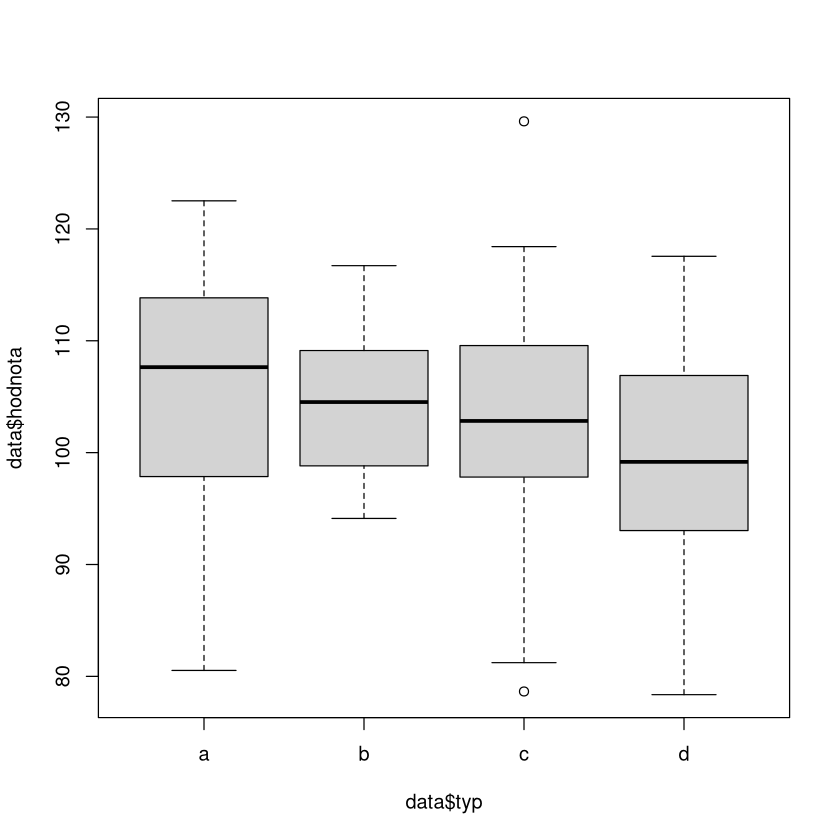

In [2]:
boxplot(data$hodnota ~ data$typ)
# pokud jsou k dispozici nějaká OP, budu je igrorovat
# (vím, že data jsou z normálního rozdělení!)
# (vím i že mají stejný rozptyl)


# Přehled funkcí 
## Míry variability
### Bartlettův test
- ověřuje shodu rozptylů
    - $H_0: \sigma^2_1 = \sigma^2_2 = \sigma^2_3 = \ldots$
    - $H_A: \neg H_0$
- předpokladem je normalita dat (a samozřejmě nezávislost a spojitost)

In [3]:
bartlett.test(data$hodnota ~ data$typ)



	Bartlett test of homogeneity of variances

data:  data$hodnota by data$typ
Bartlett's K-squared = 6.26, df = 3, p-value = 0.09963


### Leveneův test
- ověřuje shodu rozptylů
    - $H_0: \sigma^2_1 = \sigma^2_2 = \sigma^2_3 = \ldots$
    - $H_A: \neg H_0$
- předpokladem je pouze nezávislost a spojitost

In [4]:
car::leveneTest(data$hodnota ~ data$typ)


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,1.12812,0.3401269
,133,NA,NA


### Cochranův a Hartleyův test
- také ověřují shodu rozptylů
- požadují normalitu dat a tzv. vyvážené třízení
    - vyvážené třízení znamená, že máme přibližně stejné množství dat v každé skupině
- nebudeme je používat

## Míry polohy
### ANOVA (analýza rozptylu)
- ověřuje shodu polohy (středních hodnot)
    - $H_0: \mu_1 = \mu_2 = \mu_3 = \ldots$
    - $H_A: \neg H_0$
- předpoklady:
    - normalita dat
    - homoskedasticita (shodné rozptyly)
    - (a samozřejmě nezávislost a spojitost)
- pokud zamítáme $H_0$ je vyžadována Post-Hoc analýza
    - pomocí TukeyHSD testu

In [ ]:
# Základní ANOVA
# H0: mu1 = mu2 = mu3 = mu4
# HA: ~H0 (negace H0)

res <- aov(data$hodnota ~ data$typ)
summary(res)


In [ ]:
# Post-Hoc analýza

TukeyHSD(res)


In [ ]:
# počítání efektů
library(dplyr)

# celkový průměr
prumer_vsech <- mean(data$hodnota)
prumer_vsech

# průměry ve skupinách
efekty <- data %>%
    group_by(typ) %>%
    summarize(mean_skup = mean(hodnota))

# efekty
efekty$efekt <- efekty$mean_skup - prumer_vsech

# vypsat setřízené
efekty %>% arrange(desc(efekt))


### Kruskalův - Wallisův test
- ověřuje shodu polohy (mediánů)
    - $H_0: X_{0.5,1} = X_{0.5,2} = X_{0.5,3} = \ldots$
    - $H_A: \neg H_0$
- předpoklady:
    - symetrie dat
    - (a samozřejmě nezávislost a spojitost)
- pokud zamítáme $H_0$ je vyžadována Post-Hoc analýza
    - pomocí Dunnové testu/metody

In [ ]:
# Základní KW test
# H0: X0.5,1 = X0.5,2 = X0.5,3 = X0.5,4
# HA: ~H0 (negace H0)

kruskal.test(data$hodnota ~ data$typ)


In [ ]:
# Post-Hoc analýza

# altP = T nastavuje p-hodnotu tak,aby se při rozhodování
# o statistické významnosti srovnávala s alfa
# (defaultně: altp = FALSE, pak srovnáváme s alfa/2)

# install.packages("dunn.test")

dunn.test::dunn.test(
    x = data$hodnota, g = data$typ,
    method = "bonferroni", altp = TRUE
)


In [ ]:
# počítání efektů

# celkový median
median_vsech <- median(data$hodnota)
median_vsech

# mediany ve skupinách
efekty <- data %>%
    group_by(typ) %>%
    summarize(median_skup = median(hodnota))

# efekty
efekty$efekt <- efekty$median_skup - median_vsech

# vypsat setřízené
efekty %>% arrange(desc(efekt))


# Příklady
## Příklad 1.
Testujeme nulovou hypotézu µ1 = µ2 = µ3. Bylo zjištěno, že data, která máme k dispozici jsou výběry z normálního rozdělení splňující předpoklad homoskedasticity (shody rozptylů). Na základě údajů získaných explorační analýzou doplňte tabulku ANOVA a vyplývající závěry.<br>
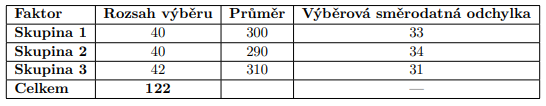

In [ ]:
n <- c(40, 40, 42) # rozsahy výběrů
prum <- c(300, 290, 310) # průměry v jednotlivých skupinách / třídách
s <- c(33, 34, 31) # směr. odchylky v jednotlivých skup. / třídách


In [ ]:
n.total <- sum(n) # celkový rozsah výběrů
k <- 3 # počet tříd
df.b <- k - 1 # počet stupňů volnosti - meziskupinový
df.e <- n.total - k # počet stupňů volnosti - reziduální


In [ ]:
# celkový průměr (pomocí váženého průměru)
prum.total <- weighted.mean(x = prum, w = n)
prum.total


In [ ]:
# meziskupinový součet čtverců
ss.b <- sum(n * (prum - prum.total)^2)
ss.b


In [ ]:
# reziduální součet čtverců
ss.e <- sum((n - 1) * s^2)
ss.e


In [ ]:
# celkový součet čtverců
ss.b + ss.e


In [ ]:
# rozptyl mezi skupinami / třídami
ms.b <- ss.b / df.b
ms.b


In [ ]:
# rozptyl uvnitř skupin / tříd
ms.e <- ss.e / df.e
ms.e


In [ ]:
# F-poměr
F_ratio <- ms.b / ms.e
F_ratio


In [ ]:
# p-hodnota
p <- 1 - pf(F_ratio, df.b, df.e)
p

# Na hladině významnosti 0,05 zamítáme hypotézu o shodě středních hodnot
# tj. střední hodnoty alespoň jedné dvojice skupin se stat. významně liší.


In [ ]:
# odhady skupinových efektů
efekt <- prum - prum.total
efekt

# Oproti celkovému průměru vykazuje nejvíce podprůměrné výsledky skupina 2
# (o cca 10 jednotek nižší než celkový průměr). Naopak průměr skupiny 3 je
# o cca 10 jednotek vyšší než celkový průměr. Průměrné výsledky skupiny 1
# odpovídají celkovému průměru.


## Příklad 2.
122 pacientů, kteří podstoupili operaci srdce, bylo náhodně rozděleno do tří skupin.<br>
**Skupina 1:** Pacienti dostali 50 % oxidu dusného a 50 % kyslíkové směsi nepřetržitě po dobu 24 hodin.<br>
**Skupina 2:** Pacienti dostali 50 % oxidu dusného a 50 % kyslíkové směsi pouze během operace.<br>
**Skupina 3:** Pacienti nedostali žádný oxid dusný, ale dostali 35-50 % kyslíku po dobu 24 hodin.<br>
Data v souboru kyselina listova.xls odpovídají koncentracím soli kyseliny listové v červených krvinkách ve všech třech skupinách po uplynutí 24 hodin ventilace. Ověřte, zda pozorované rozdíly mezi koncentracemi soli kyseliny listové jsou statisticky významné, tj. zda existuje vliv složení směsi na sledovaný parametr.

In [ ]:
kysel <- readxl::read_excel("data/testy_vicevyberove.xlsx", sheet = 1)
colnames(kysel) <- c("sk1", "sk2", "sk3") # přejmenování sloupců
kysel


In [ ]:
# převod do standardního datového formátu
kysel.s <- stack(kysel)
colnames(kysel.s) <- c("hodnoty", "skupina")
kysel.s <- na.omit(kysel.s)
head(kysel.s)


In [ ]:
boxplot(kysel.s$hodnoty ~ kysel.s$skupina)
# Data neobsahují odlehlá pozorování.


In [ ]:
# otestujeme normalitu pomocí S.-W. testu
library(dplyr)

kysel.s %>%
    group_by(skupina) %>%
    summarise(norm.pval = shapiro.test(hodnoty)$p.value)


In [ ]:
# Informace potřebné pro nastavení zaokrouhlování

kysel.s %>%
    group_by(skupina) %>%
    summarise(len = length(hodnoty), st.dev = sd(hodnoty))

# sd zaokrouhlujeme na 3 platné cifry
# sd a míry polohy zaokrouhlujeme na desetiny


In [ ]:
# Ověření shody rozptylů
s2 <- kysel.s %>%
        group_by(skupina) %>%
        summarise(var = sd(hodnoty)^2)
s2 # výběrové rozptyly

max(s2$var) / min(s2$var)
# Dle krabicového grafu a informace o poměru největšího a nejmenšího
# rozptylů (<2) nepředpokládáme, že se rozptyly statisticky významně liší


In [ ]:
# Předpoklad normality nebyl zamítnut -> Bartlettův test
bartlett.test(kysel.s$hodnoty ~ kysel.s$skupina)

# Na hladině významnosti 0,05 nelze zamítnout předpoklad o shodě rozptylů
# (Bartlettův test, x_OBS = 0,878, df = 2, p-hodnota = 0,645).


In [ ]:
# Chceme srovnávat stř. hodnoty nezávislých výběrů z normálních rozdělení
# se stejnými rozptyly -> ANOVA
# příkaz aov() vyžaduje data ve standardním datovém formátu

vysledky <- aov(kysel.s$hodnoty ~ kysel.s$skupina)
summary(vysledky)

# Na hladině významnosti 0,05 zamítáme hypotézu o shodě středních hodnot
# (ANOVA, p-hodnota<<0,001) -> mnohonásobné porovnávání


In [ ]:
# post-hoc analýza
TukeyHSD(vysledky)


In [ ]:
# počítání efektů
library(dplyr)

# celkový průměr
prumer_vsech <- mean(kysel.s$hodnoty)
prumer_vsech

# průměry ve skupinách
efekty <- kysel.s %>%
    group_by(skupina) %>%
    summarize(mean_skup = mean(hodnoty))

# efekty
efekty$efekt <- efekty$mean_skup - prumer_vsech

# vypsat setřízené
efekty %>% arrange(desc(efekt))

# Považujeme-li vysoký obsah kyseliny listové za pozitivní, pak statisticky
# významně nejlepších výsledků dosáhli pacienti ze skupiny 1 (průměrný obsah
# kys. listové o cca 27 jednotek vyšší než prům. obsah kys. listové v krvi
# všech testovaných pacientů) a statisticky významně nejhorších výsledků
# dosáhli pacienti ze skup. 2 (průměrný obsah kys. listové o cca 26 jednotek
# nižší než průměrný obsah kys. listové v krvi všech testovaných pacientů).
# Obsah kys. listové v krvi pacientů ze skupiny 3
# odpovídá celkovému průměru. Všechny tři skupiny pacientů jsou navzájem dle
# obsahu kys. listové v krvi statisticky významně odlišné.


## Příklad 3.
Na farmě jsou chována tři plemena králíků. Byl proveden pokus kralici.xls, jehož cílem bylo zjistit, zda i když chováme a vykrmujeme všechny králíky po stejnou dobu a za stejných podmínek, existuje statisticky významný (průkazný) rozdíl mezi plemeny v hmotnostech králíků. Ověřte.

In [ ]:
kralici <- readxl::read_excel("data/testy_vicevyberove.xlsx", sheet = 2)
colnames(kralici) <- c("viden", "cesky", "kalif") # přejmenování sloupců
kralici


In [ ]:
# převod do standardního datového formátu
kralici.s <- stack(kralici)
colnames(kralici.s) <- c("hodnoty", "skupina")
kralici.s <- na.omit(kralici.s)
head(kralici.s)


In [ ]:
boxplot(kralici.s$hodnoty ~ kralici.s$skupina)
# data obsahojí OP


In [ ]:
# Odstranění odlehlého pozorování
pom <- boxplot(kralici.s$hodnoty ~ kralici.s$skupina, plot = FALSE)
pom$out

kralici.s$hodnoty.bez <- kralici.s$hodnoty
kralici.s$hodnoty.bez[kralici.s$hodnoty.bez %in% pom$out] <- NA

# Krabicový graf
boxplot(kralici.s$hodnoty.bez ~ kralici.s$skupina)


In [ ]:
library(dplyr)

kralici.s %>%
    group_by(skupina) %>%
    summarise(norm.pval = shapiro.test(hodnoty.bez)$p.value)

# Na hladině významnosti 0,05 nezamítáme předpoklad normality.


In [ ]:
# Informace potřebné pro nastavení zaokrouhlování
kralici.s %>%
    group_by(skupina) %>%
    summarize(
        len = sum(!is.nan(hodnoty.bez)),
        sd = sd(hodnoty.bez, na.rm = TRUE)
    )

# sd zaokrouhlujeme na 2 platné cifry
# sd a míry polohy zaok. na setiny (sjednocení napříč druhy králíků)


In [ ]:
# Ověření shody rozptylů
s2 <- kralici.s %>%
        group_by(skupina) %>%
        summarize(var = sd(hodnoty.bez, na.rm = TRUE)^2)
s2

max(s2$var) / min(s2$var)
# Dle krabicového grafu a informace o poměru největšího a nejmenšího rozpt.
# (blízký 2, avšak rozsah výběrů < 30) je těžší odhadnout, zda lze
# předpokládat shodu rozptylů. Rozhodnout nám pomůže test.


In [ ]:
# Předpoklad normality nebyl zamítnut -> Bartlettův test
bartlett.test(kralici.s$hodnoty.bez ~ kralici.s$skupina)

# Na hladině významnosti 0,05 nelze zamítnout předpoklad o shodě rozptylů
# (Bartlettův test, x_OBS = 3,1, df = 2, p-hodnota = 0,217).


In [ ]:
# Chceme srovnávat stř. hodnoty nezávislých výběrů z normálních
# rozdělení se stejnými rozptyly -> ANOVA
# příkaz aov() vyžaduje data ve standardním datovém formátu

vysledky <- aov(kralici.s$hodnoty.bez ~ kralici.s$skupina)
summary(vysledky)

# Na hladině významnosti 0,05 zamítáme hypotézu o shodě středních hodnot
# (p-hodnota<<0,001, ANOVA) -> mnohonásobné porovnávání


In [ ]:
# post-hoc analýza
TukeyHSD(vysledky)


In [ ]:
# počítání efektů
library(dplyr)

# celkový průměr
prumer_vsech <- mean(kralici.s$hodnoty.bez, na.rm = TRUE)
prumer_vsech

# průměry ve skupinách
efekty <- kralici.s %>%
    group_by(skupina) %>%
    summarize(mean_skup = mean(hodnoty.bez, na.rm = TRUE))

# efekty
efekty$efekt <- efekty$mean_skup - prumer_vsech

# vypsat setřízené
efekty %>% arrange(desc(efekt))


## Příklad 4.
Soutěž o nejlepší jakost výrobků obeslali čtyři výrobci A, B, C, D celkem 66 výrobky. Porota sestavila pořadí (uvedeno pouze pořadí výrobku od nejlepšího k nejhoršímu), jež je uvedené v souboru jakost.xls. Na základě uvedených údajů posuďte, zda původ výrobků má vliv na jeho jakost.

In [ ]:
jakost.s <- readxl::read_excel("data/testy_vicevyberove.xlsx", sheet = 3)
colnames(jakost.s) <- c("poradi", "skupina") # přejmenování sloupců
head(jakost.s)
# data již jsou v standardním formátu


In [ ]:
boxplot(jakost.s$poradi ~ jakost.s$skupina)

# Ověření normality nemá smysl provádět - z povahy jde o diskr. data-pořadí


In [ ]:
# Informace potřebné pro nastavení zaokrouhlování
jakost.s %>%
    group_by(skupina) %>%
    summarize(
        len = length(poradi),
        sd = sd(poradi)
    )

# sd zaokrouhlujeme na 2 platné cifry
# sd a míry polohy zaokrouhlujeme na celá čísla


In [ ]:
# Ověření shody rozptylů
s2 <- jakost.s %>%
    group_by(skupina) %>%
    summarize(var = sd(poradi)^2)
s2

max(s2$var) / min(s2$var)
# Dle krabicového grafu a informace o poměru největšího a nejmenšího
# rozptylů (<2) ze předpokládat shodu rozptylů.
# (Kruskalův - Wallisův test má větší sílu testu, jsou-li data homosk.)


In [ ]:
# Jde o "pořadová" data, nemá smysl uvažovat o předpokladu norm.
# -> Leveneův test
car::leveneTest(jakost.s$poradi ~ jakost.s$skupina)
# Na hladině významnosti 0,05 nelze zamítnout předpoklad o shodě rozptylů
# (Leveneho test, x_OBS = 0,4, df_num = 3, df_denom = 62, p-hodnota = 0,750)


In [ ]:
# Ověření symetrie

jakost.s %>%
    group_by(skupina) %>%
    summarize(
        sikmost = moments::skewness(poradi),
        test.pval = lawstat::symmetry.test(poradi, boot = FALSE)$p.value
    )


In [ ]:
# Chceme srovnávat mediány nezávislých výběrů -> Kruskalův-Wallisův test
kruskal.test(jakost.s$poradi ~ jakost.s$skupina)

# Na hladině významnosti 0,05 nelze zamítnout hypotézu o shodě mediánů
# (Kruskalův-Wallisův test, x_OBS = 3,7, df = 3, p-hodnota=0,295).
# Tj. statisticky významné rozdíly mezi výrobci (z hlediska pořadí
# výrobků v soutěži) neexistují.


## Příklad 5.
Byl sledován vliv tří preparátů na srážlivost krve. Kromě jiných ukazatelů byl zjišťován tzv. trombinový čas. Údaje o 42 sledovaných osobách jsou zaznamenány v souboru trombin.xls. Závisí velikost trombinového času na tom, jaký byl použit preparát?

In [ ]:
trombin.s <- readxl::read_excel("data/testy_vicevyberove.xlsx",
    sheet = 4, skip = 1
)
colnames(trombin.s) <- c("hodnoty", "skupina") # přejmenování sloupců

head(trombin.s)
# data jsou již ve standardním formátu


In [ ]:
# explorační analýza - ověření OP
boxplot(trombin.s$hodnoty ~ trombin.s$skupina)
# neobsahuje OP


In [ ]:
# ověření normality
library(dplyr)

trombin.s %>%
    group_by(skupina) %>%
    summarize(norm.pval = shapiro.test(hodnoty)$p.value)

# Na hladině významnosti 0,05 zamítáme předpoklad normality (u Ačka)


In [ ]:
# Informace potřebné pro nastavení zaokrouhlování

trombin.s %>%
    group_by(skupina) %>%
    summarize(len = length(hodnoty), stdev = sd(hodnoty))

# sd zaokrouhlujeme na 2 platné cifry
# sd a míry polohy zaokrouhlujeme na setiny (sjednocení napříč skupinami)


In [ ]:
# Ověření shody rozptylů (není nutné - stejně musíme použít KW)
s2 <- trombin.s %>%
        group_by(skupina) %>%
        summarize(var = sd(hodnoty)^2)
s2

max(s2$var) / min(s2$var)
# Dle krabicového grafu a informace o poměru největšího a nejmenšího
# rozptylů (>>2) nelze předpokládat shodu rozptylů.


In [ ]:
# Předpoklad normality byl zamítnut -> Leveneho test

# trombin.s$skupina = as.factor(trombin.s$skupina)

car::leveneTest(trombin.s$hodnoty ~ trombin.s$skupina)

# předpoklad homoskedasticity byl zamítnut


In [ ]:
# Ověření symetrie
trombin.s %>%
  group_by(skupina) %>%
  summarize(
    sikmost = moments::skewness(hodnoty),
    test.pval = lawstat::symmetry.test(hodnoty, boot = FALSE)$p.value
  )
# nezamítáme přepoklad symetrie dat


In [ ]:
# Chceme srovnávat mediány nez. výběrů, která nemají norm. rozdělení
# -> Kruskalův - Wallisův test

kruskal.test(trombin.s$hodnoty, trombin.s$skupina)
# Na hladině významnosti 0,05 zamítáme hypotézu o shodě mediánů
# Tj. trombinový čas je statisticky významně
# ovlivněn preparátem. -> mnohonásobné porovnávání


In [ ]:
# altP = T nastavuje p-hodnotu tak,aby se při rozhodování
# o statistické významnosti srovnávala s alfa
# (defaultně: altp = FALSE, pak srovnáváme s alfa/2)

dunn.test::dunn.test(trombin.s$hodnoty, trombin.s$skupina,
    method = "bonferroni", altp = TRUE
)


In [ ]:
# počítání efektů
library(dplyr)

# celkový průměr
median_vsech <- median(trombin.s$hodnoty)
median_vsech

# průměry ve skupinách
efekty <- trombin.s %>%
    group_by(skupina) %>%
    summarize(median_skup = median(hodnoty))

# efekty
efekty$efekt <- efekty$median_skup - median_vsech

# vypsat setřízené
efekty %>% arrange(desc(efekt))


## Příklad 6. (více skupin)
Co se Sněhurka dostala k sedmi trpaslíkům vycítila příležitost nemalého výdělku. Trpaslíci Sněhurce v podstatě zobou z ruky a veškeré vydolované zlato jí ihned předávají. Sněhurce však ani toto úplně nestačí a má pocit, že by mohla z trpaslíků benefitovat více. Proto si začla zaznamenávat kolik kilogramů zlata denně od každého z trpaslíků obdrží (snehurka.xlsx). Ověřte, zda se trpaslíci liší v množství vytěženého zlata, pokud ano sestave homogenní skupiny z hlediska vytěženého zlata.

In [ ]:
zlato <- readxl::read_excel("data/snehurka.xlsx")
head(zlato)
# data jsou ve standardním dtovém formátu


In [ ]:
boxplot(zlato$hodnota ~ zlato$typ)
# data neobsahují OP


In [ ]:
# ověření normality
library(dplyr)

zlato %>%
    group_by(typ) %>%
    summarize(p.hodnota = shapiro.test(hodnota)$p.value)

# Na hladině významnosti 0,05 ne zamítáme předpoklad normality


In [ ]:
# Předpoklad normality nebyl zamítnut -> Bartlettův test
bartlett.test(zlato$hodnota ~ zlato$typ)

# Na hladině významnosti 0,05 nelze zamítnout předpoklad o shodě rozptylů


In [ ]:
# ANOVA
vysledky <- aov(zlato$hodnota ~ zlato$typ)
summary(vysledky)
# Zamítáme předpoklad o shodě
# -> existují stat. významné rozdíly ve středních hodnotách


In [ ]:
# POST-HOC
res <- TukeyHSD(vysledky)[[1]]
res


In [ ]:
# počítání efektů
library(dplyr)

# celkový průměr
prumer_vsech <- mean(zlato$hodnota)
prumer_vsech

# průměry ve skupinách
efekty <- zlato %>%
    group_by(typ) %>%
    summarize(mean_skup = mean(hodnota))

# efekty
efekty$efekt <- efekty$mean_skup - prumer_vsech

# vypsat setřízené
efekty.s <- efekty %>% arrange(desc(efekt))
efekty.s
